---

## Universidad de Costa Rica

### Facultad de Ingeniería

### Escuela de Ingeniería Eléctrica

#### IE0405 - Modelos Probabilísticos de Señales y Sistemas

---
---

### Tarea 03: Frecuencia relativa de dos variables aleatorias

#### *Realizado por:*  **Jean Carlos Alvarado Brenes**

### **1) (25 %) A partir de los datos, encontrar la mejor curva de ajuste (modelo probabilístico) para las funciones de densidad marginales de X y Y.**

> **Función de densidad marginal de X**

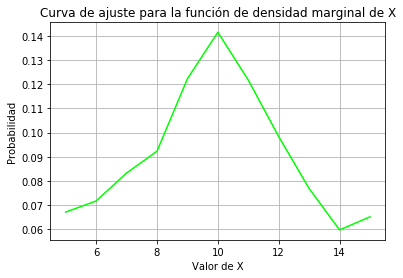

In [85]:
#Nota: Eliminé la columna de x5,x6,...,x15 del archivo original "xy.csv"
#Leer el archivo
file=pd.read_csv("xy2.csv")
#Se crea el vector de X por medio de linspace
xvects=np.linspace(5,15,11)
#Se crea el vector de Y por medio de linspace
yvects=np.linspace(5,25,21)
#Se obtienen los vectores de las sumas de X y Y
sumvecty=np.sum(file, axis=0)
sumvectx=np.sum(file, axis=1)

#Se grafica la curva de ajuste para X y se definen todos sus parámetros
plt.plot(xvects,sumvectx, color='lime')
plt.grid()
plt.title('Curva de ajuste para la función de densidad marginal de X')
plt.ylabel('Probabilidad')
plt.xlabel('Valor de X')
plt.show()

> **Función de densidad marginal de Y**

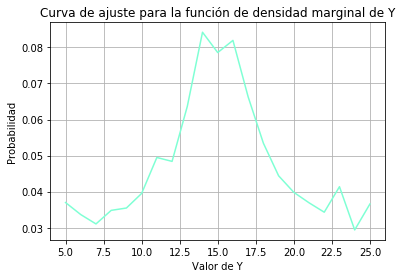

In [86]:
#Se grafica la curva de ajuste para Y y se definen todos sus parámetros
plt.plot(yvects,sumvecty,  color='aquamarine')
plt.title('Curva de ajuste para la función de densidad marginal de Y')
plt.ylabel('Probabilidad')
plt.xlabel('Valor de Y')
plt.grid()
plt.show()

In [87]:
#Se importan las librerías a utilizar
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

#Se define la función Gaussiana
def gaussiana(x, mu, sigma):
    return 1/(np.sqrt(2*np.pi*sigma**2))*np.exp(-(x-mu)**2/(2*sigma**2))
#Se obtienen los parámetrós para X y Y.
param1, _ = curve_fit(gaussiana, xvects ,sumvectx)
print("Parámetros de ajuste Gaussiana para X = ",param1)
param2, _ = curve_fit(gaussiana, yvects ,sumvecty)
print("Parámetros de ajuste Gaussiana para Y = ",param2)

Parámetros de ajuste Gaussiana para X =  [9.90484381 3.29944288]
Parámetros de ajuste Gaussiana para Y =  [15.0794609   6.02693775]


### **2) (25 %) Asumir independencia de X y Y. Analíticamente, ¿cuál es entonces la expresión de la función de densidad  conjunta que modela los datos?**

> Independencia entre X y Y implicaría lo siguiente:

#### $$f_{X,Y}(x,y) =f_{X}(x)f_{Y}(y)$$

> Por lo tanto al tener como X: 

#### $$X = \frac{1}{\sqrt{2\pi \sigma ^{2}} \cdot e^\frac{{-(x-\mu )^{2}}}{2\sigma^{2}}}$$
> Con:

| Variable | Valor |
| ------ | ---- |
| $$\mu$$  |  9.90484381  |
| $$\sigma$$  |  3.29944288  |

> Y al tener Y como:

#### $$Y = \frac{1}{\sqrt{2\pi \sigma ^{2}}\cdot e^\frac{{-(x-\mu )^{2}}}{2\sigma^{2}}}$$

> Con:

| Variable | Valor |
| ------ | ---- |
| $$\mu$$  |  15.0794609  |
| $$\sigma$$  |  6.02693775  |

> Al realizar la multiplicación de X y de Y, además de sustituir los valores, se obtendría lo siguiente:

#### $$X\cdot Y = 0.008 \cdot e^{-\left (\frac{{(x-9.904)}^2}{21.76}+\frac{{(y-15.07)}^2}{72.62}\right )}$$ 

> Por lo tanto, esta es expresión de la función de densidad.

### **3) (25 %) Hallar los valores de correlación, covarianza y coeficiente de correlación (Pearson) para los datos y explicar su significado.**

> **Correlación** 
> - "La correlación es el grado en el cual dos o más cantidades están linealmente asociadas".
> - Pero (fundamentalmente) “correlación no implica causalidad”.

In [88]:
#Leer el archivo
file2=pd.read_csv("xyp.csv")
#Realizar las multiplicaciones para encontrar la correlacion (faltaria la suma)
file2['resultado1'] = file2['x']*file2['y']*file2['p']
#Hacer la suma 
correlacion=np.sum(file2['resultado1'] , axis=0)
print("La correlación Rxy es = ",correlacion)

La correlación Rxy es =  149.54281


##### **R/** Por lo tanto, este dato significa que las variables aleatorias X y Y sí están linealmente asociadas.

> **Covarianza**
> - Es un valor que indica el grado de variación conjunta de dos variables aleatorias respecto a sus medias.
> - Cuando los valores altos de una variable corresponden en mayor manera a los valores altos de la otra variable, y si pasa de la misma manera con los valores pequeños de una con la otra, esto quiere decir que se refleja un valor positivo en la covarianza.
> - Si ocurre el caso contrario, que los valores más altos de una, correspondan a los más bajos de la otra, expresando un comportamiento opuesto, esto quiere decir que la covarianza es negativa.
> - Por lo tanto, el signo de la covarianza expresa la tendencia en la relación lineal entre variables.

In [89]:
#se encuentra la media
mediax=np.mean(file2['x'])
mediay=np.mean(file2['y'])
#se realiza la fórmula
file2['resultado2'] = (file2['x']-mediax)*(file2['y']-mediay)*file2['p']
#Hacer la suma 
covarianza=np.sum(file2['resultado2'] , axis=0)
print("La covarianza es = ",covarianza)

La covarianza es =  0.06481000000000009


##### **R/** Por lo tanto, este valor significa primeramente, que los valores altos de la variable X se corresponden mayoritariamente con los valores altos de la variable Y, esto también con los valores pequeños de ambas variables. Hay dependencia directa entre X y Y.

> **Coeficiente de correlación de Pearson**
> - Es una medida de dependendia lineal entre dos variables aleatorias cuantitativas.
> - A diferencia de la covarianza, esta es independiente de la escala de medida de las variables.

In [90]:
#Calcular la varianza de x y y
varianzax=np.std(file2['x'])
varianzay=np.std(file2['y'])
#Calcular la "multiplicacion"
file2['resultado3'] = (file2['resultado2'])/(varianzax*varianzay)
#Hacer la suma
coefcorre=np.sum(file2['resultado3'] , axis=0)
#imprimir el resultado
print('El coeficiente de correlación es =', coefcorre)

El coeficiente de correlación es = 0.0033845918647466364


##### **R/** Por lo tanto, a como se mencionó anteriormente, las variables son linealmente dependientes.

### **4) (25 %) Graficar las funciones de densidad marginales (2D), la función de densidad conjunta (3D).**

> **Función de densidad marginal de X**

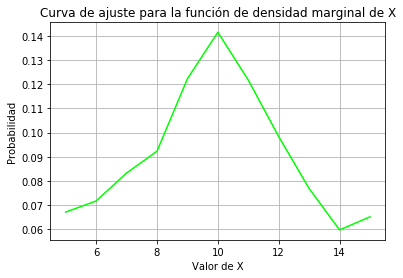

In [91]:
#Leer el archivo
file=pd.read_csv("xy2.csv")
#Se crea el vector de X por medio de linspace
xvects=np.linspace(5,15,11)
#Se crea el vector de Y por medio de linspace
yvects=np.linspace(5,25,21)
#Se obtienen los vectores de las sumas de X y Y
sumvecty=np.sum(file, axis=0)
sumvectx=np.sum(file, axis=1)

#Se grafica la curva de ajuste para X y se definen todos sus parámetros
plt.plot(xvects,sumvectx, color='lime')
plt.grid()
plt.title('Curva de ajuste para la función de densidad marginal de X')
plt.ylabel('Probabilidad')
plt.xlabel('Valor de X')
plt.show()

> **Función de densidad marginal de Y**

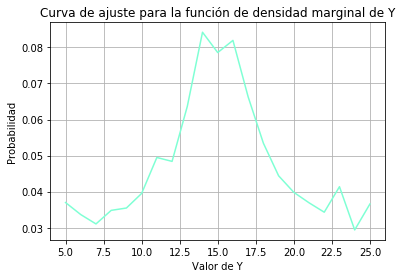

In [92]:
#Se grafica la curva de ajuste para Y y se definen todos sus parámetros
plt.plot(yvects,sumvecty,  color='aquamarine')
plt.title('Curva de ajuste para la función de densidad marginal de Y')
plt.ylabel('Probabilidad')
plt.xlabel('Valor de Y')
plt.grid()
plt.show()

> **Función de distribución conjunta**

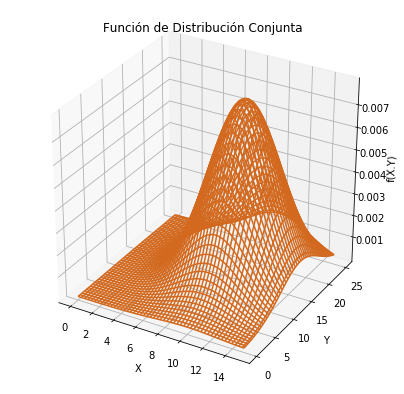

In [93]:
#Se definen las librerías a utilizar
from matplotlib.pyplot import *
from pylab import *
from mpl_toolkits.mplot3d.axes3d import Axes3D

x = np.linspace(0,15,100)
y = np.linspace(0,25,100)
x,y = np.meshgrid(x,y)
z = 0.008*np.exp(-((((x-9.904)**2)/15.7)+(((y-15.04)**2)/59.06)))
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_wireframe(x,y,z,rstride=2,cstride=2, color= 'chocolate')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(X.Y)')
ax.set_title('Función de Distribución Conjunta')
plt.show()